In [38]:
import os
from pathlib import Path

#Project folders
PROJECT_ROOT = Path.cwd()
DATA_DIR = PROJECT_ROOT / "data"
IMAGES_DIR = PROJECT_ROOT / "images"
SNIPPETS_DIR = PROJECT_ROOT / "snippets"

for d in (DATA_DIR, IMAGES_DIR, SNIPPETS_DIR):
    d.mkdir(parents=True, exist_ok=True)

print("Project root:", PROJECT_ROOT)
print("Data dir:", DATA_DIR)
print("Images dir:", IMAGES_DIR)

# CSV paths ===
candidates = [
    DATA_DIR / "Sample - Superstore.csv",
    Path("archive") / "Superstore.csv",
    Path("E:/Retail Analytics Project/archive/Superstore.csv"),
    Path("E:/Retail Analytics Project/Superstore.csv"),
    Path("./Superstore.csv"),
]

csv_path = None
for c in candidates:
    if c.exists():
        csv_path = c
        break

if csv_path is None:
    print("WARNING: Could not auto-find Superstore.csv in common locations.")
    print("Place Superstore.csv into the project `data/` folder or update the csv_path variable below.")

else:
    print("Found CSV at:", csv_path)


Project root: C:\Users\hsnrh
Data dir: C:\Users\hsnrh\data
Images dir: C:\Users\hsnrh\images
Found CSV at: C:\Users\hsnrh\data\Sample - Superstore.csv


In [40]:
import pandas as pd
from IPython.display import display


try:
    csv_path  #
except NameError:
    raise FileNotFoundError("csv_path not set. Set csv_path variable in Cell 0 to the Superstore.csv path.")


encodings = ["utf-8", "latin1", "cp1252"]
df = None
for enc in encodings:
    try:
        df = pd.read_csv(csv_path, encoding=enc)
        print(f"Loaded with encoding: {enc}")
        break
    except Exception as e:
        print(f"Failed load with {enc}: {str(e)[:140]}")

if df is None:
    raise ValueError("Unable to read CSV. Check path and encoding.")


print("Shape:", df.shape)
# Showing only the main columns for screenshot clarity
display(df[['Order ID', 'Order Date', 'Ship Mode', 'Segment', 'Sales', 'Profit']].head())

print("\n=== df.info() ===")
display(df.info())


df.head(10).to_csv(IMAGES_DIR / "01_raw_head.csv", index=False)
df.head(10).to_html(IMAGES_DIR / "01_raw_head.html", index=False)
print("Saved head ->", IMAGES_DIR / "01_raw_head.csv")


Failed load with utf-8: 'utf-8' codec can't decode byte 0xf6 in position 9: invalid start byte
Loaded with encoding: latin1
Shape: (9994, 21)


,Order ID,Order Date,Ship Mode,Segment,Sales,Profit
0,CA-2016-152156,11/8/2016,Second Class,Consumer,261.9600,41.9136
1,CA-2016-152156,11/8/2016,Second Class,Consumer,731.9400,219.5820
2,CA-2016-138688,6/12/2016,Second Class,Corporate,14.6200,6.8714
3,US-2015-108966,10/11/2015,Standard Class,Consumer,957.5775,-383.0310
4,US-2015-108966,10/11/2015,Standard Class,Consumer,22.3680,2.5164



=== df.info() ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   fl

None

Saved head -> C:\Users\hsnrh\images\01_raw_head.csv


In [43]:
# 02_cleaning_eda.ipynb
# Phase 2 - Data Cleaning and Exploration
# -----------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Load the cleaned-up version or raw one from before
csv_path = Path.cwd().parent / "hsnrh" / "data" / "Sample - Superstore.csv"
df = pd.read_csv(csv_path, encoding="latin1")

print("Initial shape:", df.shape)

# Quick info
print("\n--- Basic Info ---")
df.info()

# Check duplicates and missing values
print("\nDuplicate rows:", df.duplicated().sum())
print("Missing values per column:")
print(df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)
# dropping rows with too many nulls
df = df.dropna(how='all')

print("\nAfter cleaning - shape:", df.shape)
#summary stats
print("\n--- Numerical Summary ---")
print(df.describe())
# Convert dates if needed
# -----------------------------------------------
if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
if 'Ship Date' in df.columns:
    df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# sanity check
if 'Sales' in df.columns and 'Quantity' in df.columns:
    df['Sales per Item'] = df['Sales'] / df['Quantity']

# Exploratory Data Analysis (EDA)
print("\n\n")

Initial shape: (9994, 21)

--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales 

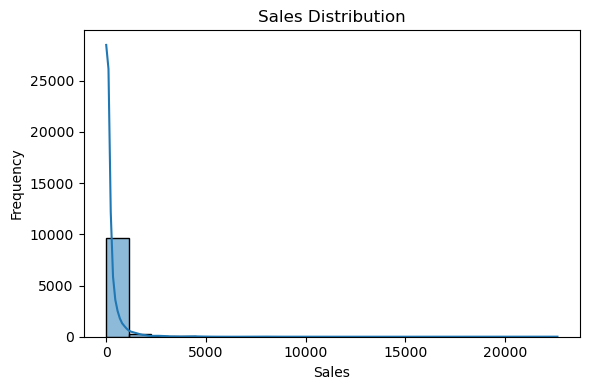

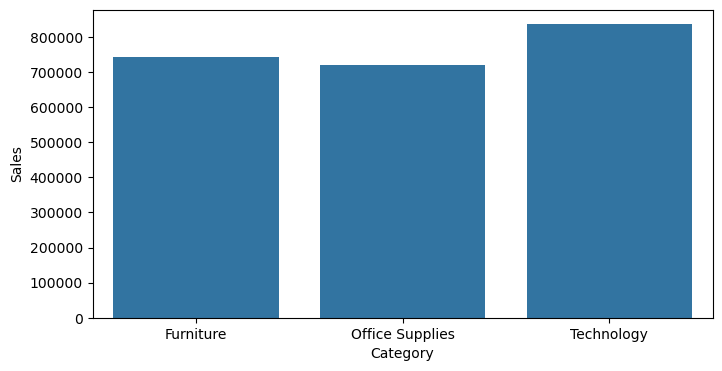

In [30]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()
print("\n\n")



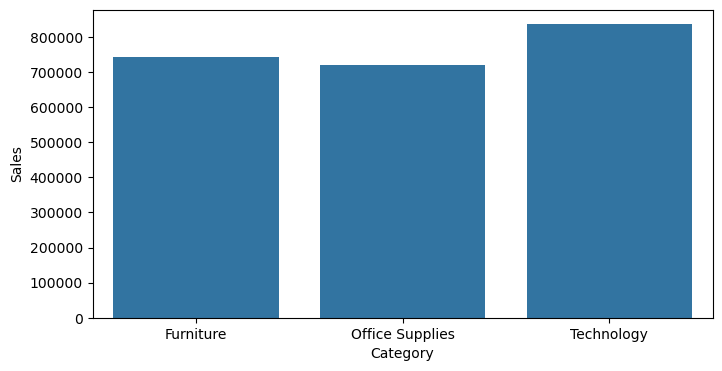

In [44]:
plt.figure(figsize=(8, 4))
if 'Category' in df.columns:
    sns.barplot(x='Category', y='Sales', data=df, estimator=sum, errorbar=None)

Initial shape: (9994, 21)

--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales 

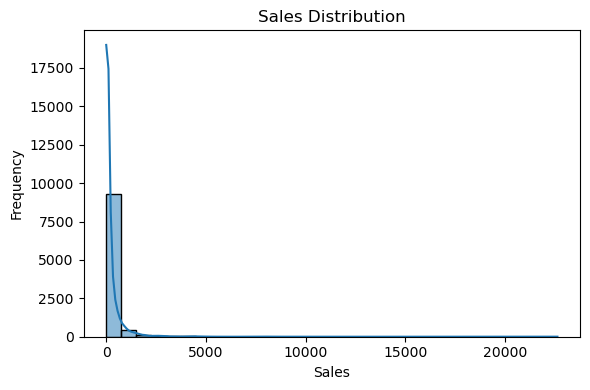

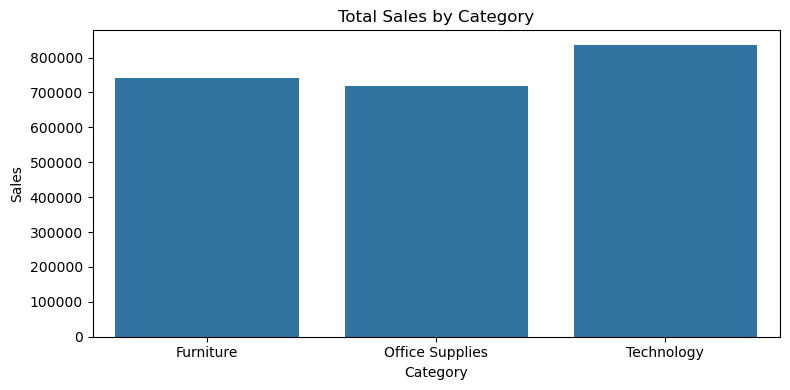

In [ ]:
)
    plt.title("Total Sales by Category")
    plt.tight_layout()
    plt.show()

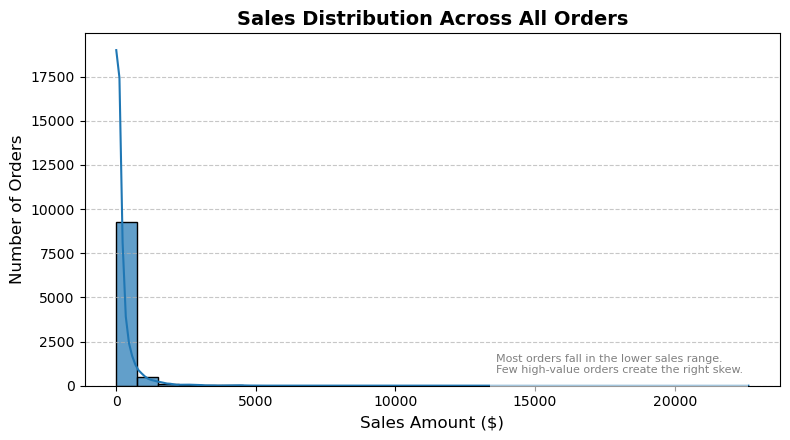

In [50]:
plt.figure(figsize=(8, 4.5))
sns.histplot(df['Sales'], bins=30, kde=True, color="#1f77b4", alpha=0.7)
plt.title("Sales Distribution Across All Orders", fontsize=14, weight='bold')
plt.xlabel("Sales Amount ($)", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
# Add gridlines 
plt.grid(axis='y', linestyle='--', alpha=0.7)
# Adding  annotation
plt.text(
    x=df['Sales'].max() * 0.6,
    y=df['Sales'].value_counts().max() * 0.8,
    s="Most orders fall in the lower sales range.\nFew high-value orders create the right skew.\n",
    fontsize=8,
    color='gray',
    bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))

plt.tight_layout()
plt.show()

In [51]:
# Saving cleaned data

cleaned_path = Path.cwd().parent /"hsnrh"/"data" /"cleaned_superstore.csv"
df.to_csv(cleaned_path, index=False)
print("\nCleaned data saved at:", cleaned_path)


Cleaned data saved at: C:\Users\hsnrh\data\cleaned_superstore.csv
